In [6]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

data_path = "../data/Womens Clothing E-Commerce Reviews.csv"
df = pd.read_csv(data_path)
df.columns
df["Review Text"].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Review Text, dtype: object

In [7]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\denni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\denni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# Englische Stopwörter laden
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    
    # in Kleinschreibung umwandeln
    text = text.lower()
    
    # Sonderzeichen, Zahlen etc. entfernen (nur Buchstaben und Leerzeichen behalten)
    text = re.sub(r'[^a-z\s]', ' ', text)
    
    # Tokenisierung
    tokens = word_tokenize(text)
    
    # Stopwörter entfernen
    tokens = [token for token in tokens if token not in stop_words and len(token) > 2]
    
    # Tokens zurück zu String
    return " ".join(tokens)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\denni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [9]:
# Neue Spalte mit bereinigten Texten
df["clean_text"] = df["Review Text"].apply(clean_text)

# Zur Kontrolle ein paar Zeilen anzeigen
df[["Review Text", "clean_text"]].head()


,Review Text,clean_text
0,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky sexy comfortable
1,Love this dress! it's sooo pretty. i happene...,love dress sooo pretty happened find store gla...
2,I had such high hopes for this dress and reall...,high hopes dress really wanted work initially ...
3,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...
4,This shirt is very flattering to all due to th...,shirt flattering due adjustable front tie perf...


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag-of-Words Modell initialisieren
bow_vectorizer = CountVectorizer()

# Fit und Transformation der bereinigten Texte
bow_matrix = bow_vectorizer.fit_transform(df["clean_text"])

bow_matrix


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 577359 stored elements and shape (23486, 13238)>

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Modell initialisieren
tfidf_vectorizer = TfidfVectorizer()

# Fit und Transformation
tfidf_matrix = tfidf_vectorizer.fit_transform(df["clean_text"])

tfidf_matrix


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 577359 stored elements and shape (23486, 13238)>

In [12]:
print("BoW Shape:", bow_matrix.shape)
print("TF-IDF Shape:", tfidf_matrix.shape)


BoW Shape: (23486, 13238)
TF-IDF Shape: (23486, 13238)


In [13]:
feature_names = bow_vectorizer.get_feature_names_out()

doc_index = 0  # erstes Dokument
bow_doc = bow_matrix[doc_index].toarray()[0]
tfidf_doc = tfidf_matrix[doc_index].toarray()[0]

word_scores = list(zip(feature_names, bow_doc, tfidf_doc))

sorted_scores = sorted(word_scores, key=lambda x: x[2], reverse=True)
sorted_scores[:10]


[('silky', np.int64(1), np.float64(0.5480485868060899)),
 ('sexy', np.int64(1), np.float64(0.5026785753121215)),
 ('wonderful', np.int64(1), np.float64(0.47439007778191955)),
 ('absolutely', np.int64(1), np.float64(0.38572867453256754)),
 ('comfortable', np.int64(1), np.float64(0.27041531052704143)),
 ('aaaaaaamazing', np.int64(0), np.float64(0.0)),
 ('aaaaandidon', np.int64(0), np.float64(0.0)),
 ('aaaaannnnnnd', np.int64(0), np.float64(0.0)),
 ('aaaahmazing', np.int64(0), np.float64(0.0)),
 ('aaaahs', np.int64(0), np.float64(0.0))]

In [14]:
from sklearn.decomposition import LatentDirichletAllocation

# LDA Modell definieren — z.B. 5 Themen
lda = LatentDirichletAllocation(n_components=5, random_state=42)

# Modell auf BoW Matrix trainieren
lda.fit(bow_matrix)


,n_components,5
,doc_topic_prior,None
,topic_word_prior,None
,learning_method,'batch'
,learning_decay,0.7
,learning_offset,10.0
,max_iter,10
,batch_size,128
,evaluate_every,-1
,total_samples,1000000.0
,perp_tol,0.1


In [15]:
def display_topics(model, feature_names, n_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"🔹 Topic {idx}: ", [feature_names[i] for i in topic.argsort()[-n_words:]])
        
display_topics(lda, bow_vectorizer.get_feature_names_out())


🔹 Topic 0:  ['top', 'dress', 'comfortable', 'sweater', 'soft', 'color', 'perfect', 'wear', 'great', 'love']
🔹 Topic 1:  ['waist', 'top', 'fit', 'fabric', 'beautiful', 'size', 'skirt', 'love', 'like', 'dress']
🔹 Topic 2:  ['bought', 'comfortable', 'pair', 'great', 'like', 'wear', 'love', 'fit', 'jeans', 'pants']
🔹 Topic 3:  ['usually', 'top', 'petite', 'medium', 'would', 'large', 'ordered', 'fit', 'small', 'size']
🔹 Topic 4:  ['fit', 'material', 'really', 'back', 'would', 'look', 'fabric', 'dress', 'like', 'top']


In [16]:
from sklearn.decomposition import TruncatedSVD

# LSA mit 5 Themen
lsa = TruncatedSVD(n_components=5, random_state=42)
# LSA auf TF-IDF-Matrix anwenden
lsa_topic_matrix = lsa.fit_transform(tfidf_matrix)


In [17]:
display_topics(lsa, tfidf_vectorizer.get_feature_names_out())


🔹 Topic 0:  ['would', 'small', 'like', 'wear', 'fit', 'great', 'top', 'size', 'love', 'dress']
🔹 Topic 1:  ['waist', 'belt', 'knee', 'wedding', 'flattering', 'petite', 'dresses', 'slip', 'beautiful', 'dress']
🔹 Topic 2:  ['pants', 'color', 'compliments', 'super', 'perfect', 'soft', 'jeans', 'comfortable', 'love', 'great']
🔹 Topic 3:  ['wear', 'fits', 'perfect', 'ordered', 'medium', 'great', 'fit', 'true', 'small', 'size']
🔹 Topic 4:  ['large', 'small', 'runs', 'compliments', 'true', 'size', 'dress', 'fits', 'love', 'top']


In [18]:
from gensim import corpora
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel

# Texte in Token-Listen umwandeln
tokenized_texts = [text.split() for text in df["clean_text"]]

# Wörterbuch und Korpus für gensim erstellen
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]


In [19]:
# Funktion zur Berechnung des Coherence Scores für mehrere Topic-Anzahlen
def compute_coherence_values(k_values):
    scores = []
    for k in k_values:
        # LDA-Modell mit k Themen trainieren
        lda_model = LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=k,
            random_state=42,
            passes=5
        )
        # Coherence Score für dieses Modell berechnen
        coherence_model = CoherenceModel(
            model=lda_model,
            texts=tokenized_texts,
            dictionary=dictionary,
            coherence='c_v'
        )
        score = coherence_model.get_coherence() # Numerischer Score-Wert
        scores.append((k, score))
        print(f"Anzahl Topics = {k}, Coherence Score = {score:.4f}")
    return scores

k_values = range(2, 11)  # 2 bis 10 Topics testen
coherence_scores = compute_coherence_values(k_values)
coherence_scores

Anzahl Topics = 2, Coherence Score = 0.3839
Anzahl Topics = 3, Coherence Score = 0.3929
Anzahl Topics = 4, Coherence Score = 0.4060
Anzahl Topics = 5, Coherence Score = 0.4196
Anzahl Topics = 6, Coherence Score = 0.4198
Anzahl Topics = 7, Coherence Score = 0.4221
Anzahl Topics = 8, Coherence Score = 0.4279
Anzahl Topics = 9, Coherence Score = 0.4477
Anzahl Topics = 10, Coherence Score = 0.4418


[(2, np.float64(0.38389863682581304)),
 (3, np.float64(0.3928974702440733)),
 (4, np.float64(0.4059827773038827)),
 (5, np.float64(0.4196261852838826)),
 (6, np.float64(0.4198165823837892)),
 (7, np.float64(0.42208133065515485)),
 (8, np.float64(0.427918539913935)),
 (9, np.float64(0.44773345017673083)),
 (10, np.float64(0.44177533737551206))]

In [20]:
best_k, best_score = max(coherence_scores, key=lambda x: x[1])
print(f"Beste Topic-Anzahl laut Coherence Score: {best_k} (Score = {best_score:.4f})")


Beste Topic-Anzahl laut Coherence Score: 9 (Score = 0.4477)


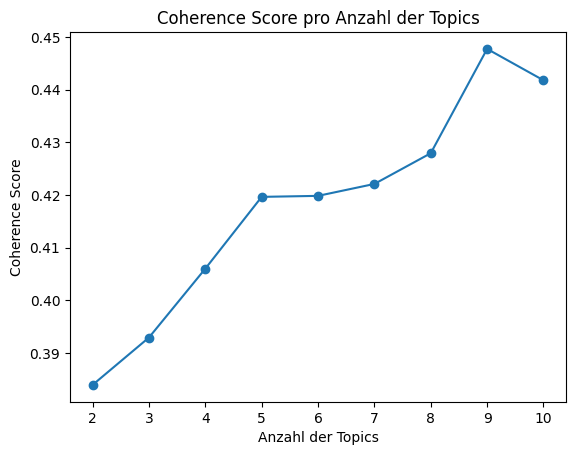

In [21]:
import matplotlib.pyplot as plt

ks = [k for k, s in coherence_scores]
scores = [s for k, s in coherence_scores]

plt.plot(ks, scores, marker='o')
plt.xlabel("Anzahl der Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score pro Anzahl der Topics")
plt.show()


In [22]:
optimal_lda = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=best_k,  # also 9
    random_state=42,
    passes=5
)


In [23]:
topics = optimal_lda.show_topics(num_topics=best_k, num_words=10, formatted=False)

for idx, topic in topics:
    print(f"\n -> Topic {idx}:")
    print([word for word, prob in topic])



 -> Topic 0:
['size', 'small', 'ordered', 'fit', 'large', 'medium', 'would', 'usually', 'wear', 'tried']

 -> Topic 1:
['washed', 'dry', 'wash', 'eye', 'back', 'hand', 'washing', 'delicate', 'time', 'first']

 -> Topic 2:
['top', 'shirt', 'love', 'little', 'back', 'like', 'fabric', 'pretty', 'wear', 'bra']

 -> Topic 3:
['jeans', 'pants', 'love', 'fit', 'great', 'pair', 'size', 'wear', 'comfortable', 'perfect']

 -> Topic 4:
['sweater', 'love', 'soft', 'color', 'jacket', 'great', 'like', 'long', 'sleeves', 'looks']

 -> Topic 5:
['like', 'fabric', 'look', 'would', 'really', 'material', 'waist', 'back', 'fit', 'way']

 -> Topic 6:
['dress', 'size', 'love', 'fit', 'beautiful', 'length', 'perfect', 'color', 'petite', 'flattering']

 -> Topic 7:
['great', 'love', 'wear', 'comfortable', 'dress', 'perfect', 'fits', 'compliments', 'flattering', 'well']

 -> Topic 8:
['one', 'first', 'suit', 'year', 'day', 'retailer', 'last', 'time', 'ever', 'wearing']


In [24]:
### Interpretation der Themen (LDA)

#Auf Basis der Top-Begriffe wurden die Themen semantisch interpretiert:

#1. **Passform & Größenbewertung** – Rückmeldungen zu small/large, bestellten Größen und Sitz.
#2. **Pflege / Wascherfahrung** – Waschen, Materialverhalten, first wear.
#3. **Oberteile-Komfort** – Feedback zu Tops und Tragegefühl.
#4. **Jeans/Hosen Sitz** – Erfahrungen zu Jeans und Passform.
#5. **Strickmode & Komfort** – Bewertungen zu Sweatern, Jacken und Materialgefühl.
#6. **Material & Qualität** – Wahrnehmung zu Stoffqualität und Aussehen.
#7. **Kleider & Schönheit** – Länge, Farbe, flattering fit (besonders Figurthemen).
#8. **Komfort & Komplimente** – positives Tragegefühl, perfekte Passform.
#9. **Langzeit-/Nutzungserfahrung** – Wie lange getragen, Haltbarkeit, first use.
